# Perceptron 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
X = iris.data[:, [0,1]]
y = iris.target
y = np.where(y != 0, y, -1)
y = np.where(y == -1, y, 1)

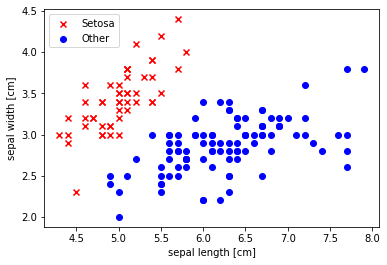

In [3]:
plt.scatter(X[:50, 0], X[:50, 1], marker='x', color='red', label='Setosa')
plt.scatter(X[50:, 0], X[50:, 1], marker='o', color='blue', label='Other')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

In [4]:
class Perceptron(object):
    def __init__(self, eta=.01, n_iter=50, init_with_zeros=True, random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.init_with_zeros = init_with_zeros
        self.random_seed = random_seed

        self.errors = None
        self.theta = None

    def init_theta(self, X):
        shape = (X.shape[1] + 1, 1)

        if self.init_with_zeros:
            self.theta = np.zeros(shape)
        else:
            rnd_gen = np.random.RandomState(self.random_seed)
            self.theta = rnd_gen.normal(size=shape, loc=0, scale=.01)

    def add_intercept(self, X):
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    def fit(self, X, y):
        self.init_theta(X)

        y = y.reshape(-1, 1)
        X = self.add_intercept(X)

        for i in range(self.n_iter):
            self.theta += self.eta * np.dot(X.T, (y - self.predict(X)))

    def output(self, X):
        return np.dot(X, self.theta)

    def predict(self, X):
        if X.shape[1] != self.theta.shape[0]:
            X = self.add_intercept(X)
        return np.where(self.output(X) >= 0, 1, -1)

In [5]:
perceptron = Perceptron()

In [6]:
perceptron.fit(X, y)

In [7]:
preds = perceptron.predict(X).reshape(-1)

In [8]:
y, preds

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1

In [9]:
minus, pos = [], []

for x in X:
    pred = perceptron.predict(x.reshape(1, 2))
    pred = pred.reshape(-1)
    
    if pred[0] == -1:
        minus.append(x)
    else:
        pos.append(x)
        
minus, pos = np.array(minus), np.array(pos)

Text(0.5, 1.0, 'Predicted classes')

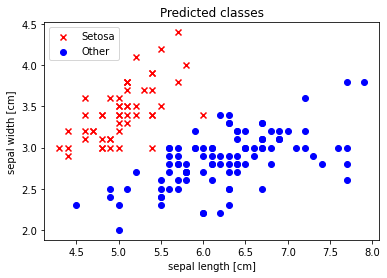

In [10]:
plt.scatter(minus[:, 0], minus[:, 1], marker='x', color='red', label='Setosa')
plt.scatter(pos[:, 0], pos[:, 1], marker='o', color='blue', label='Other')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.title('Predicted classes')

In [11]:
y = np.where(y != -1, y, 0)
preds = np.where(preds != -1, preds, 0)

In [12]:
'Accuracy score: {}%'.format(accuracy_score(y, preds)*100)

'Accuracy score: 98.0%'